# ANALYSING US FATAL POLICE SHOOTINGS FROM 2015-2020

This dataset is taken from The Washington Post's [Github repository](https://github.com/washingtonpost/data-police-shootings). It contains data related to every fatal shooting of a civilian by a police officer in the States in the line of duty. The time duration is from the start of the year 2015 to 2020. The Post decided to collect data regarding these shootings after the unfortunate death of Micheal Brown. Sources of this data are news accounts, social media posts and police reports.

To refer to their own analysis of this dataset, go to [this link](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/)

I will be performing an Exploratory Data Analysis on this dataset.

In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/usps20/2017.csv
/kaggle/input/usps20/2015.csv
/kaggle/input/usps20/2016.csv
/kaggle/input/usps20/2018.csv
/kaggle/input/usps20/usps.csv


**DATA WRANGLING AND CLEANING:**

In [29]:
usps=pd.read_csv('/kaggle/input/usps20/usps.csv')
usps.drop(['id'],axis=1,inplace=True)

In [30]:
usps.head()

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [4]:
usps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5716 entries, 0 to 5715
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     5499 non-null   object 
 1   date                     5716 non-null   object 
 2   manner_of_death          5716 non-null   object 
 3   armed                    5503 non-null   object 
 4   age                      5456 non-null   float64
 5   gender                   5715 non-null   object 
 6   race                     5109 non-null   object 
 7   city                     5716 non-null   object 
 8   state                    5716 non-null   object 
 9   signs_of_mental_illness  5716 non-null   bool   
 10  threat_level             5716 non-null   object 
 11  flee                     5426 non-null   object 
 12  body_camera              5716 non-null   bool   
 13  longitude                5437 non-null   float64
 14  latitude                

The dataset contains 16 columns out of which 3 are numerical, 3 are of boolean type and the rest are of type Object.

Brief description about the columns in this dataset:
1. Name- name of the deceased
2. date- date of the casualty
3. manner_of_death- was the victim only shot or shot and tasered.
4. armed- indicates whether the victim was having any object which could cause harm
5. age- age of the deceased
6. gender- sex of the victim
7. race- race of the victim, if specified
8. city- city where the casualty took place
9. state- self explanatory
10. signs_of_mental_illness- did the victim have mental health issues
11. threat_level- level of threat the officers felt they were up against.
12. flee- did the victim attempt to flee?
13. body_camera- did the officers have a body cam switched on?
14. longitude- longitude of the location of incident
15. latitude- latitude of the location of the incident
16. is_geocoding_exact- accuracy of the coordinates

In [5]:
#no. of data points in dataset, contains 5716 rows and 16 columns
usps.shape

(5716, 16)

In [6]:
#handling null values in age column
mean=usps.age.mean()
mean=round(mean)
mean

37

In [7]:
#replacing null values in age column with mean age value
usps['age']=usps['age'].fillna(37)

In [8]:
usps['gender']=usps['gender'].fillna('M')

In [9]:
#dropping all rows where race is not specified to avoid making biased conclusions
usps=usps[usps['race'].isna()==False]
usps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5711
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     5074 non-null   object 
 1   date                     5109 non-null   object 
 2   manner_of_death          5109 non-null   object 
 3   armed                    4906 non-null   object 
 4   age                      5109 non-null   float64
 5   gender                   5109 non-null   object 
 6   race                     5109 non-null   object 
 7   city                     5109 non-null   object 
 8   state                    5109 non-null   object 
 9   signs_of_mental_illness  5109 non-null   bool   
 10  threat_level             5109 non-null   object 
 11  flee                     4874 non-null   object 
 12  body_camera              5109 non-null   bool   
 13  longitude                4886 non-null   float64
 14  latitude                

**NOTE:** One could observe that there are significant number of null values in some columns of the dataset, but since the analysis I am doing is based on a sensitive topic, it would be a mistake to try to estimate the missing values of any of the columns above. Therefore I have chosen to get along with the analysis.

Splitting the "Date" column:

In [33]:
#splitting date into 3 columns year month and day
usps['year']=pd.DatetimeIndex(usps['date']).year
usps['month']=pd.DatetimeIndex(usps['date']).strftime('%b')
usps['day']=pd.DatetimeIndex(usps['date']).strftime('%A')
usps.drop(['date'],axis=1,inplace=True)

In [34]:
usps.head()

,name,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,year,month,day
0,Tim Elliot,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True,2015,Jan,Friday
1,Lewis Lee Lembke,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True,2015,Jan,Friday
2,John Paul Quintero,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True,2015,Jan,Saturday
3,Matthew Hoffman,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True,2015,Jan,Sunday
4,Michael Rodriguez,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True,2015,Jan,Sunday


In [37]:
sns.set_style('darkgrid')

**The dataset is now ready for analysis**

**DISTRIBUTION OF FATALITIES BY AGE**

(array([   7.,  606., 1530., 1292.,  933.,  579.,  357.,  106.,   34.,
          12.]),
 array([ 6. , 14.5, 23. , 31.5, 40. , 48.5, 57. , 65.5, 74. , 82.5, 91. ]),
 <a list of 10 Patch objects>)

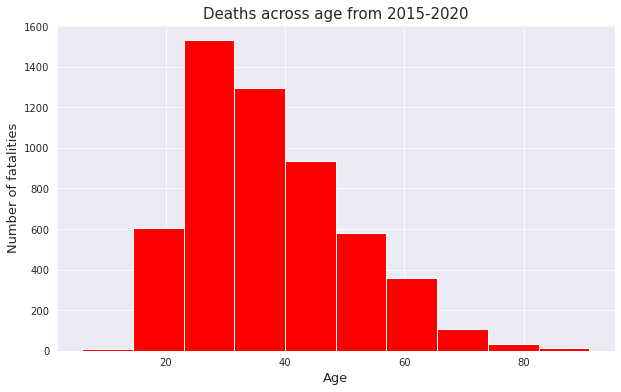

In [51]:
plt.figure(figsize=(10,6))
plt.title('Deaths across age from 2015-2020',size=15)
plt.xlabel('Age',size=13)
plt.ylabel('Number of fatalities',size=13)
plt.hist(usps['age'],color='red')

We observe that the number of deaths progressively decrease as the ages increase.Ages between 20-40 consitute over 50% of all reported casualties.Highest recorded number of deaths occur in the age group of 20 to ~30 upto 40. Lowest number is observed for ages over 60 and below 15.

**What is the maximum and minimum age of victims?**

In [46]:
usps['age'].describe()

count    5456.000000
mean       37.139113
std        13.068117
min         6.000000
25%        27.000000
50%        35.000000
75%        46.000000
max        91.000000
Name: age, dtype: float64

Youngest casualty was 6 years old and eldest was 91 years old. This is very unfortunate because people of these age groups are highly unlikely to be even involced in committing harm to anyone which points to on duty mistakes made by the police authorities. 

FATALITIES OVER THE YEARS

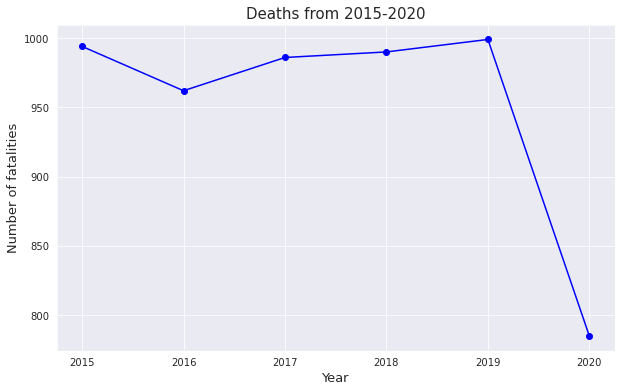

In [56]:
years=usps.groupby(['year']).year.count()
plt.figure(figsize=(10,6))
plt.title('Deaths from 2015-2020',size=15)
plt.xlabel('Year',size=13)
plt.ylabel('Number of fatalities',size=13)
plt.plot(years,color='blue',marker='o')

We observe that the number of civilian casualties per year has remained almost the same. Inspite of the citizen's outrage against these casualties,not much change has taken place. Harming civilians in any way is not viable.

In [58]:
#values represented on line chart are given below
years

year
2015    994
2016    962
2017    986
2018    990
2019    999
2020    785
Name: year, dtype: int64

CASUALTIES REPORTED IN EACH MONTH

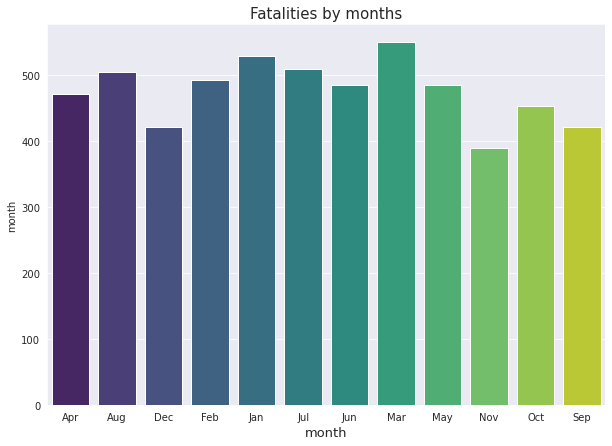

In [73]:
months=usps.groupby(['month']).month.count()
months_df=pd.DataFrame(data=months)
plt.figure(figsize=(10,7))
plt.title('Fatalities by months',size=15)
plt.xlabel('Month',size=13)
plt.ylabel('Number of fatalities')
sns.barplot(x=months_df.index,y=months_df.month,data=months_df,palette='viridis')

CASUALTIES REPORTED ON DAYS OF WEEK

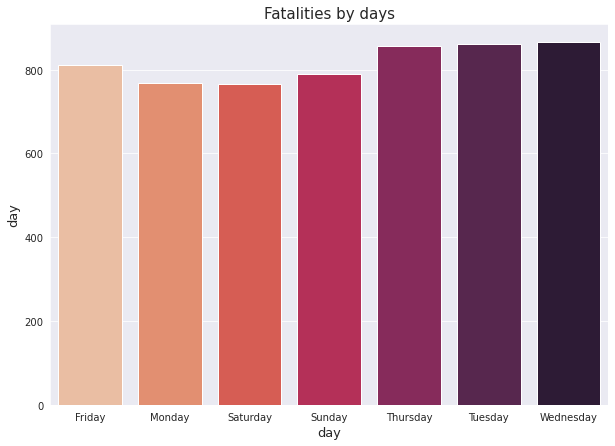

In [72]:
days=usps.groupby(['day']).day.count()
days_df=pd.DataFrame(data=days)
plt.figure(figsize=(10,7))
plt.title('Fatalities by days',size=15)
plt.xlabel('Day',size=13)
plt.ylabel('Number reported',size=13)
sns.barplot(x=days_df.index,y=days_df.day,data=days_df,palette='rocket_r')